#### Key Resources:
* [Statsmodels ARMA Model](http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMA.html#statsmodels.tsa.arima_model.ARMA)
* [Statsmodels ARMA Fit](http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMA.fit.html)
* [Statsmodels ARMA Results](http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMAResults.html#statsmodels.tsa.arima_model.ARMAResults)

In [1]:
import statsmodels.api as sm
from statsmodels import tsa
from statsmodels import graphics as smg
import numpy as np
from scipy import stats as SPstats
from time import strptime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
# import pygal as pg
import math
%matplotlib inline

ImportError: cannot import name 'TimeSeries'

In [2]:
# import Housing Starts 
HousingStarts_initial =  pd.read_csv('HousingStarts.csv')
HousingStarts_initial.set_index('Year', inplace=True)
HousingStarts_initial['LogHStrt'] = HousingStarts_initial['HousingStarts'].apply(math.log)
HousingStarts_initial

,HousingStarts,LogHStrt
Year,,
1959,1517.0,7.324490
1960,1252.2,7.132657
1961,1313.0,7.180070
1962,1462.9,7.288176
1963,1603.2,7.379757
1964,1528.8,7.332238
1965,1472.8,7.294921
1966,1164.9,7.060391
1967,1291.6,7.163637


In [23]:
# Import GDP 
GDPdat_initial =  pd.read_csv('GDP.csv')
GDPdat_initial['LogGDP'] = GDPdat_initial['GDP'].apply(math.log)
GDPdat_initial['DATE'] = pd.to_datetime(GDPdat_initial['DATE'])
GDPdat_initial.set_index('DATE', inplace=True)
# insert time predictor variable, intergers 1 to end
GDPdat_initial.insert(2,'TIME',list(range(1,len(GDPdat_initial['LogGDP'])+1)))
GDPdat_initial['Diff1LogGDP'] = GDPdat_initial['LogGDP'] - GDPdat_initial['LogGDP'].shift()
GDPdat_initial.tail(10)

,GDP,LogGDP,TIME,Diff1LogGDP
DATE,,,,
2015-04-01,16460.889,9.708742,274,0.006761
2015-07-01,16527.587,9.712786,275,0.004044
2015-10-01,16547.619,9.713998,276,0.001211
2016-01-01,16571.573,9.715444,277,0.001447
2016-04-01,16663.516,9.720977,278,0.005533
2016-07-01,16778.148,9.727833,279,0.006856
2016-10-01,16851.420,9.732190,280,0.004358
2017-01-01,16903.240,9.735261,281,0.003070
2017-04-01,17031.085,9.742795,282,0.007535


In [4]:
# Import CPI 
CPIdat_initial =  pd.read_csv('CPI.csv')
CPIdat_initial.set_index('DATE', inplace=True)
CPIdat_initial['LogCPI'] = CPIdat_initial['CPI'].apply(math.log)
CPIdat_initial['Diff1LogCPI'] = CPIdat_initial['LogCPI'] - CPIdat_initial['LogCPI'].shift()
CPIdat_initial['Diff2LogCPI'] = CPIdat_initial['Diff1LogCPI'] - CPIdat_initial['Diff1LogCPI'].shift()
CPIdat_initial

,CPI,LogCPI,Diff1LogCPI,Diff2LogCPI
DATE,,,,
1/1/1947,21.480,3.067122,NaN,NaN
2/1/1947,21.620,3.073619,0.006497,NaN
3/1/1947,22.000,3.091042,0.017424,0.010927
4/1/1947,22.000,3.091042,0.000000,-0.017424
5/1/1947,21.950,3.088767,-0.002275,-0.002275
6/1/1947,22.080,3.094672,0.005905,0.008180
7/1/1947,22.230,3.101443,0.006771,0.000865
8/1/1947,22.400,3.109061,0.007618,0.000848
9/1/1947,22.840,3.128513,0.019452,0.011834


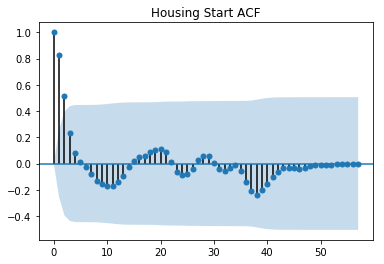

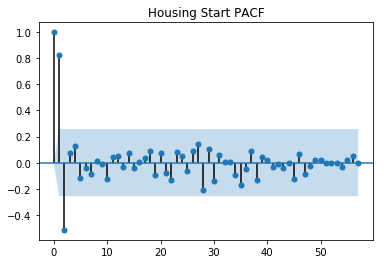

In [5]:
# Housing Start ACF, PACF

smg.tsaplots.plot_acf(HousingStarts_initial['LogHStrt'])
plt.title('Housing Start ACF')
smg.tsaplots.plot_pacf(HousingStarts_initial['LogHStrt'])
plt.title('Housing Start PACF')

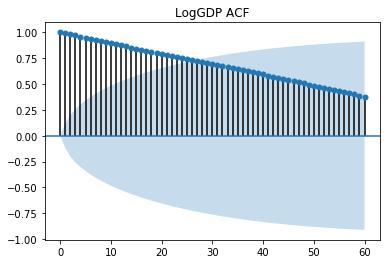

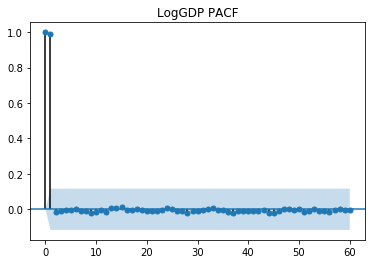

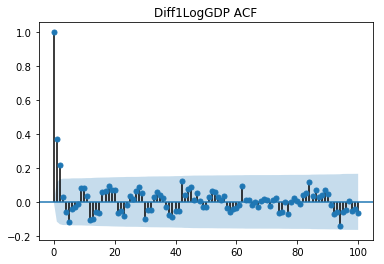

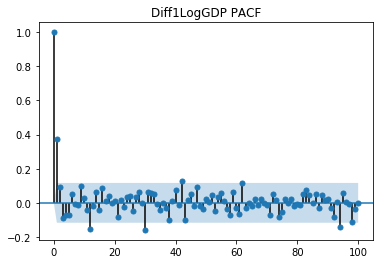

In [13]:
#LogGDP & Diff1_LogGDP ACF, PACF

smg.tsaplots.plot_acf(GDPdat_initial['LogGDP'],lags=60)
plt.title('LogGDP ACF')
smg.tsaplots.plot_pacf(GDPdat_initial['LogGDP'],lags=60)
plt.title('LogGDP PACF')


smg.tsaplots.plot_acf(GDPdat_initial.iloc[1:,3],lags=100)
plt.title('Diff1LogGDP ACF')
smg.tsaplots.plot_pacf(GDPdat_initial.iloc[1:,3],lags=100)
plt.title('Diff1LogGDP PACF')

# below returns PACF correlation values in an array 
Diff1LogGDP_PACFvalues = tsa.stattools.pacf(GDPdat_initial.iloc[1:,3])
Diff1LogGDP_ACFvalues  = tsa.stattools.acf(GDPdat_initial.iloc[1:,3])


In [7]:
# calculate yule walker for question 3. 
bPlus_calc = (1+ np.sqrt(1-4*Diff1LogGDP_PACFvalues[1]**2))/(2*Diff1LogGDP_PACFvalues[1])
bMinus_calc = (1- np.sqrt(1-4*Diff1LogGDP_PACFvalues[1]**2))/(2*Diff1LogGDP_PACFvalues[1])

print('p=', Diff1LogGDP_PACFvalues[1], '\nb+:' , bPlus_calc, '\nb-:' , bMinus_calc)

p= 0.373502747818 
b+: 2.22865544045 
b-: 0.44870103375


In [8]:
# question 4 

Diff1LogGDP_PACFvalues[1]

0.37350274781778664

In [16]:
# Question 5



r1 = Diff1LogGDP_ACFvalues[1]
r2 = Diff1LogGDP_ACFvalues[2]
 
Ahat1 = ((r2-(r1/r2))/(r1-1))
Ahat2 = r2 - (Ahat1 * r1)

print('a1: ', Ahat1, 'a2: ', Ahat2)

a1:  2.37256810235 a2:  -0.665053393401


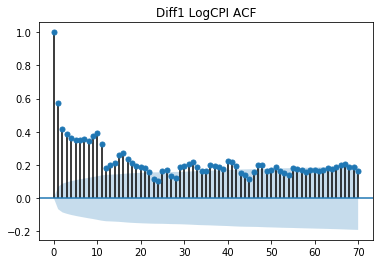

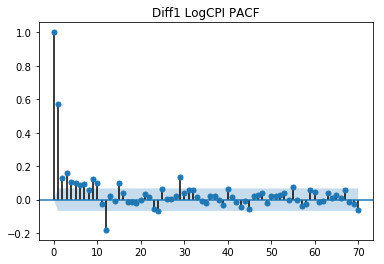

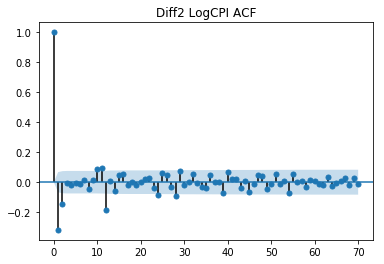

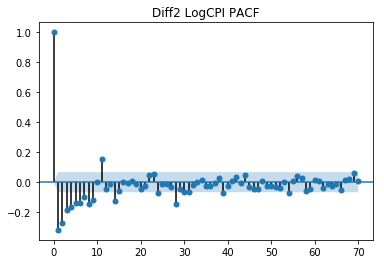

In [9]:
# Diff1_LogCPI ACF and PACF
CPIACF = smg.tsaplots.plot_acf(CPIdat_initial.iloc[1:,2],lags=70)
plt.title('Diff1 LogCPI ACF')

smg.tsaplots.plot_pacf(CPIdat_initial.iloc[1:,2],lags=70)
plt.title('Diff1 LogCPI PACF')


# Diff1_LogCPI ACF and PACF

CPIACF = smg.tsaplots.plot_acf(CPIdat_initial.iloc[2:,3],lags=70)
plt.title('Diff2 LogCPI ACF')


smg.tsaplots.plot_pacf(CPIdat_initial.iloc[2:,3],lags=70)
plt.title('Diff2 LogCPI PACF')





In [10]:
# fit an ARMA(0,1) model. ?Same as MA(1) model?
D1LogGDP_MA1 = tsa.arima_model.ARMA(GDPdat_initial.iloc[1:,3],order=(0,1))
# trend='nc' removes constant 
D1LogGDP_MA1 = D1LogGDP_MA1.fit(trend='nc')
D1LogGDP_MA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Diff1LogGDP   No. Observations:                  282
Model:                     ARMA(0, 1)   Log Likelihood                 883.388
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 05 Mar 2018   AIC                          -1762.776
Time:                        22:35:19   BIC                          -1755.492
Sample:                    04-01-1947   HQIC                         -1759.855
                         - 07-01-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
ma.L1.Diff1LogGDP     0.4261      0.042     10.230      0.000         0.344     0.508
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.3471           +0.0000j            2.3471            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
# fit an ARMA(1,0) model. ?Same as AR(1) model?
D1LogGDP_ar1 = tsa.arima_model.ARMA(GDPdat_initial.iloc[1:,3],order=(1,0))
# trend='nc' removes constant 
D1LogGDP_ar1 = D1LogGDP_ar1.fit(trend='nc')
D1LogGDP_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Diff1LogGDP   No. Observations:                  282
Model:                     ARMA(1, 0)   Log Likelihood                 912.788
Method:                       css-mle   S.D. of innovations              0.009
Date:                Mon, 05 Mar 2018   AIC                          -1821.576
Time:                        22:35:19   BIC                          -1814.292
Sample:                    04-01-1947   HQIC                         -1818.655
                         - 07-01-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
ar.L1.Diff1LogGDP     0.6245      0.046     13.497      0.000         0.534     0.715
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6012           +0.0000j            1.6012            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
# fit an ARMA(2,0) model.
D1LogGDP_ar2 = tsa.arima_model.ARMA(GDPdat_initial.iloc[1:,3],order=(2,0))
# trend='nc' removes constant 
D1LogGDP_ar2 = D1LogGDP_ar2.fit(trend='nc')
D1LogGDP_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Diff1LogGDP   No. Observations:                  282
Model:                     ARMA(2, 0)   Log Likelihood                 920.748
Method:                       css-mle   S.D. of innovations              0.009
Date:                Mon, 05 Mar 2018   AIC                          -1835.496
Time:                        22:35:19   BIC                          -1824.570
Sample:                    04-01-1947   HQIC                         -1831.114
                         - 07-01-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
ar.L1.Diff1LogGDP     0.4779      0.058      8.283      0.000         0.365     0.591
ar.L2.Diff1LogGDP     0.2336      0.058      4.049      0.000         0.121     0.347
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2851           +0.0000j            1.2851            0.0000
AR.2           -3.3306           +0.0000j            3.3306            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
# fit an ARIMA(2, 1, 0) model.
D1LogGDP_arima210 = tsa.arima_model.ARIMA(GDPdat_initial.iloc[1:,3],order=(2,1,0))
# trend='nc' removes constant 
D1LogGDP_arima210 = D1LogGDP_arima210.fit(trend='nc')
D1LogGDP_arima210.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Diff1LogGDP   No. Observations:                  281
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 904.374
Method:                       css-mle   S.D. of innovations              0.010
Date:                Mon, 05 Mar 2018   AIC                          -1802.747
Time:                        23:00:12   BIC                          -1791.832
Sample:                    07-01-1947   HQIC                         -1798.370
                         - 07-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
ar.L1.D.Diff1LogGDP    -0.4266      0.059     -7.220      0.000        -0.542    -0.311
ar.L2.D.Diff1LogGDP    -0.1313      0.059     -2.216      0.027        -0.247    -0.015
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6243           -2.2309j            2.7595           -0.3502
AR.2           -1.6243           +2.2309j            2.7595            0.3502
-----------------------------------------------------------------------------
"""

In [22]:
D1LogGDP_arima210.predict(start=282,end=284)

/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


2017-10-01   -0.000686
2018-01-01    0.000262
2018-04-01   -0.000022
Freq: QS-OCT, dtype: float64

In [20]:
GDPdat_initial.shape

(283, 4)